# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

df = pd.read_csv("C:/Users/welly/Downloads/Projeto_de_Credit_Score_Parte 1_Processamento_dos_dados/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [15]:
print(df.dtypes)
df.info()

Age                   float64
Gender                 object
Income                 object
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 130 non-null    float64
 1   Gender              164 non-null    object 
 2   Income              164 non-null    object 
 3   Education           164 non-null    object 
 4   Marital Status      164 non-null    object 
 5   Number of Children  164 non-null    int64  
 6   Home Ownership      164 non-null    object 
 7   Credit Score        164 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.4+ KB


**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [16]:
print(df.isnull().sum())


Age                   34
Gender                 0
Income                 0
Education              0
Marital Status         0
Number of Children     0
Home Ownership         0
Credit Score           0
dtype: int64


In [17]:
df['Income'] = df['Income'].replace({',': ''}, regex=True).astype(float)

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Number of Children'] = df['Number of Children'].fillna(0)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

print(df.isnull().sum())


Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64


**Etapa 1: A) fazendo as transformações quando necessário**


In [18]:
df['Income'] = df['Income'].replace({'\\.': '', ',': '.'}, regex=True).astype(float)

df['Age'] = df['Age'].fillna(0)
df['Number of Children'] = df['Number of Children'].fillna(0)

data_types = {
    'Age': 'int64',  
    'Gender': 'category',
    'Income': 'float64',
    'Education': 'category',
    'Marital Status': 'category',
    'Number of Children': 'int64',
    'Home Ownership': 'category',
    'Credit Score': 'category'
}

df = df.astype(data_types)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 164 non-null    int64   
 1   Gender              164 non-null    category
 2   Income              164 non-null    float64 
 3   Education           164 non-null    category
 4   Marital Status      164 non-null    category
 5   Number of Children  164 non-null    int64   
 6   Home Ownership      164 non-null    category
 7   Credit Score        164 non-null    category
dtypes: category(5), float64(1), int64(2)
memory usage: 5.5 KB


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [19]:
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']


for column in categorical_columns:
    print(f"Valores únicos na coluna '{column}':")
    print(df[column].unique())
    print("\nContagem de valores:")
    print(df[column].value_counts())
    print("-" * 50)


for column in categorical_columns:
    df[column] = df[column].str.strip().str.title() 


Valores únicos na coluna 'Gender':
['Female', 'Male']
Categories (2, object): ['Female', 'Male']

Contagem de valores:
Gender
Female    86
Male      78
Name: count, dtype: int64
--------------------------------------------------
Valores únicos na coluna 'Education':
['Bachelor's Degree', 'Master's Degree', 'Doctorate', 'High School Diploma', 'Associate's Degree']
Categories (5, object): ['Associate's Degree', 'Bachelor's Degree', 'Doctorate', 'High School Diploma', 'Master's Degree']

Contagem de valores:
Education
Bachelor's Degree      42
Master's Degree        36
Doctorate              31
High School Diploma    30
Associate's Degree     25
Name: count, dtype: int64
--------------------------------------------------
Valores únicos na coluna 'Marital Status':
['Single', 'Married']
Categories (2, object): ['Married', 'Single']

Contagem de valores:
Marital Status
Married    87
Single     77
Name: count, dtype: int64
--------------------------------------------------
Valores únicos na c

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

              Age      Income  Number of Children
count  164.000000  164.000000          164.000000
mean    37.195122   83.765244            0.652439
std      7.586619   32.457307            0.883346
min     25.000000   25.000000            0.000000
25%     31.750000   57.500000            0.000000
50%     36.000000   83.750000            0.000000
75%     43.000000  105.000000            1.000000
max     53.000000  162.500000            3.000000


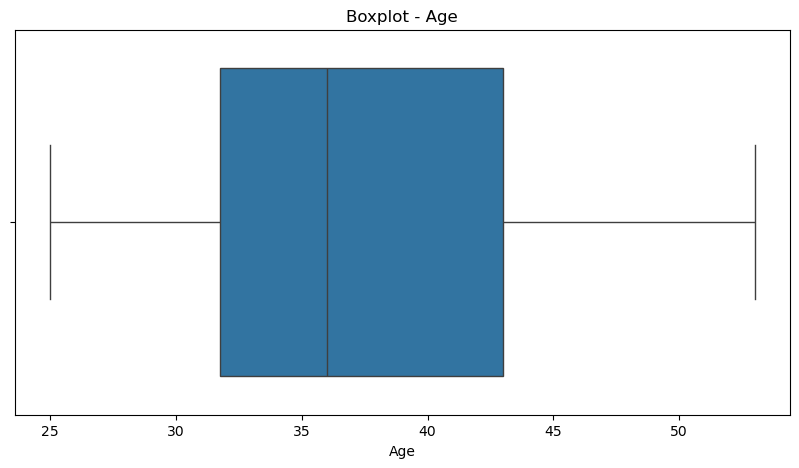

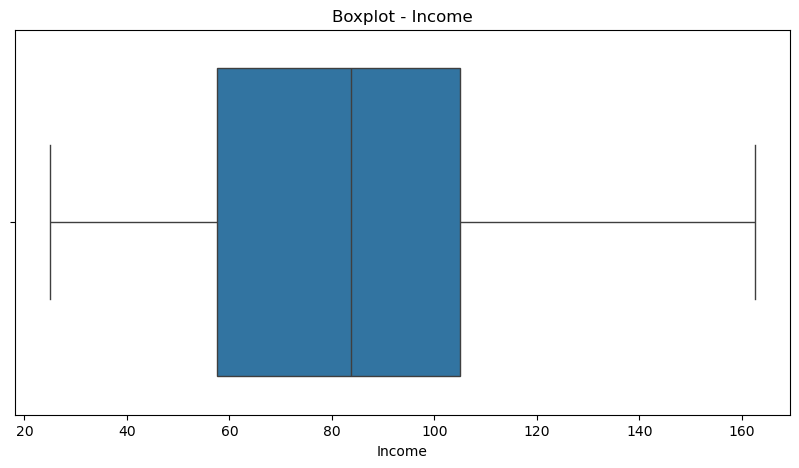

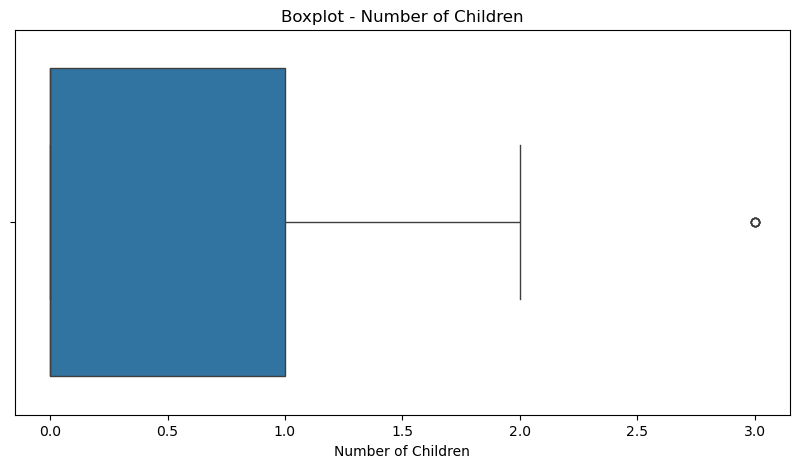

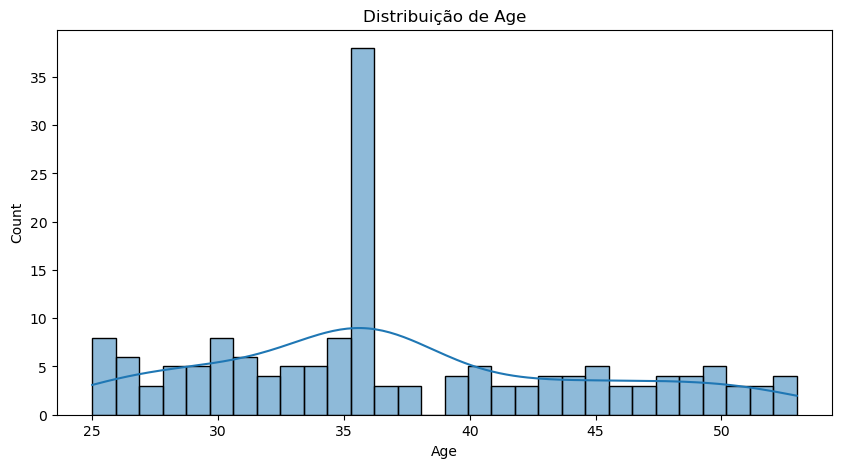

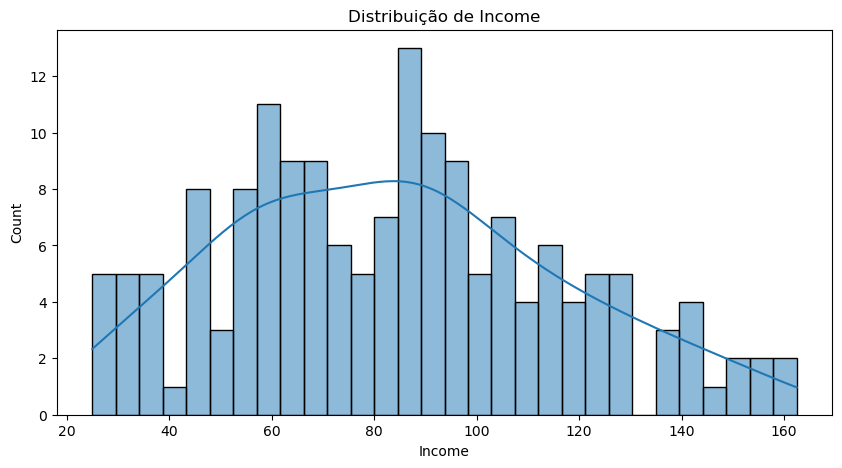

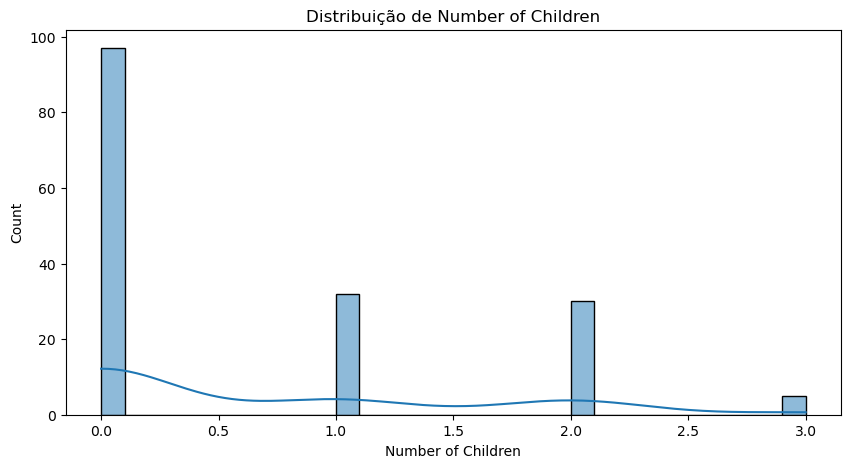

INSIGHTS INICIAIS:
- As idades parecem apresentar poucos outliers, com concentração em torno da mediana.
- O salário possui uma distribuição assimétrica, indicando a presença de valores extremos.
- A maioria das pessoas possui poucos filhos, com uma grande concentração entre zero e um ou dois filhos.


In [20]:
describe_df = df.describe()
print(describe_df)

data_numeric = ['Age', 'Income', 'Number of Children']

for column in data_numeric:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot - {column}')
    plt.show()

for column in data_numeric:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribuição de {column}')
    plt.show()

print("INSIGHTS INICIAIS:")
print("- As idades parecem apresentar poucos outliers, com concentração em torno da mediana.")
print("- O salário possui uma distribuição assimétrica, indicando a presença de valores extremos.")
print("- A maioria das pessoas possui poucos filhos, com uma grande concentração entre zero e um ou dois filhos.")

In [21]:
print("Os resultados mostram que não há outliers (valores atípicos) nas colunas Idade e Renda. "
      "No entanto, há outliers na coluna Número de Filhos, especificamente onde os indivíduos possuem 3 filhos. "
      "Esse valor foi considerado um outlier com base no método do IQR (Intervalo Interquartil).")
print("Como 3 filhos é relativamente raro, mas não necessariamente um erro, "
      "podemos optar por manter os dados como estão ou tratar esses valores. "
      "Se quiser tratar esses outliers (por exemplo, limitando o número de filhos), seria feito da seguinte forma.\n")


Q1 = df['Number of Children'].quantile(0.25)
Q3 = df['Number of Children'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df['Number of Children'] = df['Number of Children'].apply(lambda x: upper_bound if x > upper_bound else x)

outliers_after = df[df['Number of Children'] > upper_bound]
print(outliers_after)


Os resultados mostram que não há outliers (valores atípicos) nas colunas Idade e Renda. No entanto, há outliers na coluna Número de Filhos, especificamente onde os indivíduos possuem 3 filhos. Esse valor foi considerado um outlier com base no método do IQR (Intervalo Interquartil).
Como 3 filhos é relativamente raro, mas não necessariamente um erro, podemos optar por manter os dados como estão ou tratar esses valores. Se quiser tratar esses outliers (por exemplo, limitando o número de filhos), seria feito da seguinte forma.

Empty DataFrame
Columns: [Age, Gender, Income, Education, Marital Status, Number of Children, Home Ownership, Credit Score]
Index: []


**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

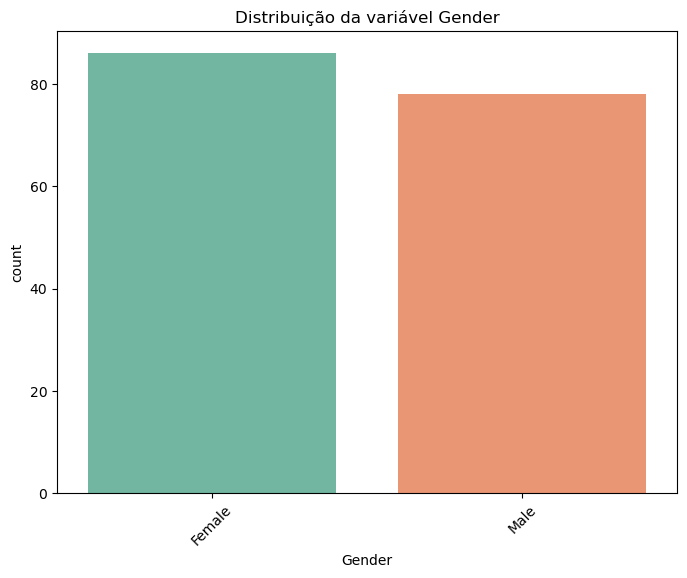


Valores únicos e suas frequências para 'Gender':
Gender
Female    86
Male      78
Name: count, dtype: int64
--------------------------------------------------


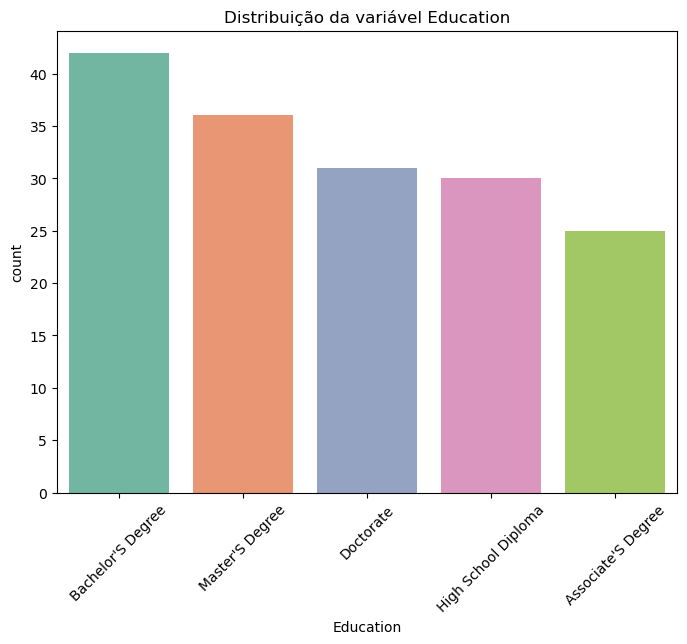


Valores únicos e suas frequências para 'Education':
Education
Bachelor'S Degree      42
Master'S Degree        36
Doctorate              31
High School Diploma    30
Associate'S Degree     25
Name: count, dtype: int64
--------------------------------------------------


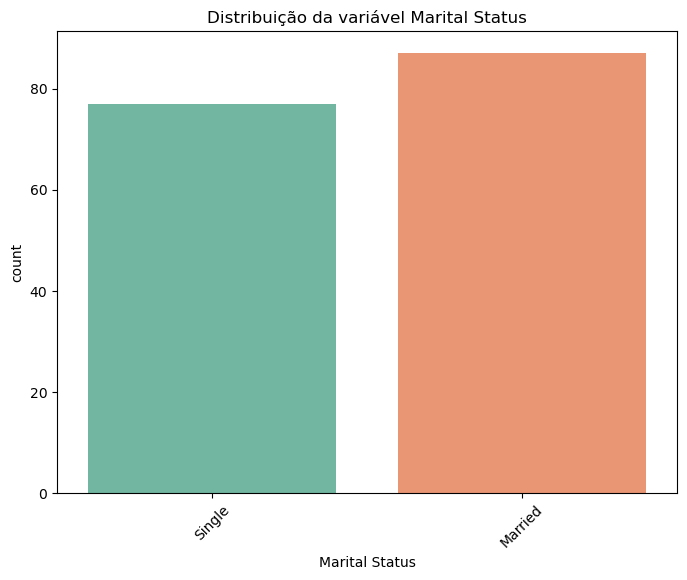


Valores únicos e suas frequências para 'Marital Status':
Marital Status
Married    87
Single     77
Name: count, dtype: int64
--------------------------------------------------


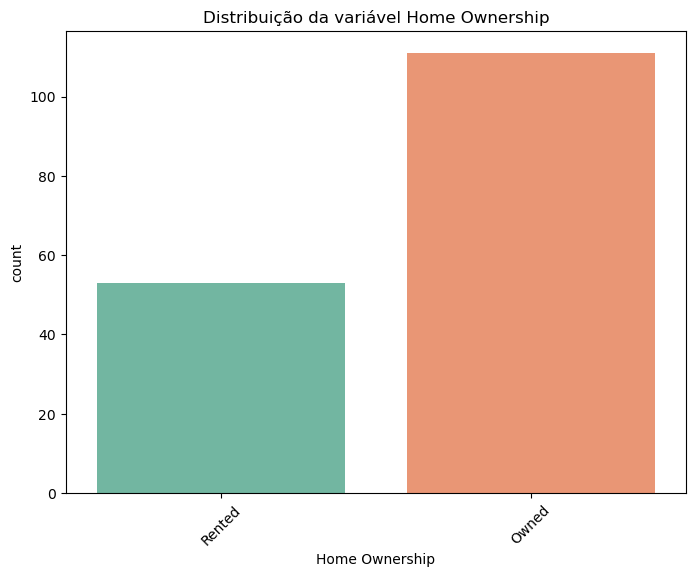


Valores únicos e suas frequências para 'Home Ownership':
Home Ownership
Owned     111
Rented     53
Name: count, dtype: int64
--------------------------------------------------


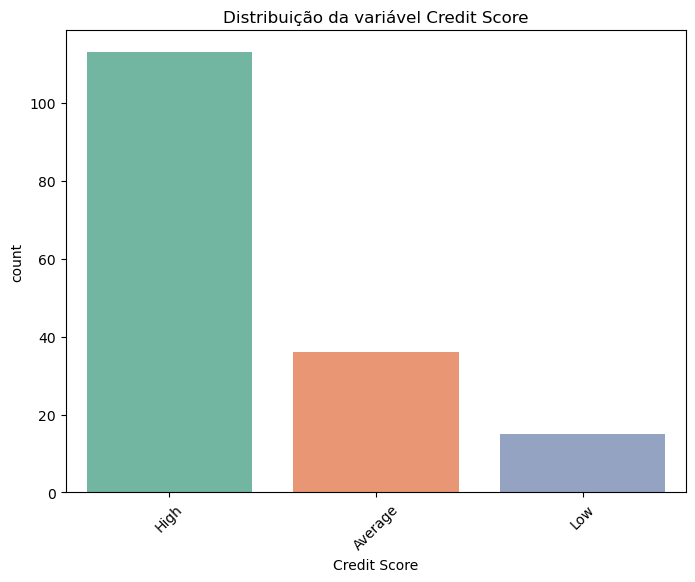


Valores únicos e suas frequências para 'Credit Score':
Credit Score
High       113
Average     36
Low         15
Name: count, dtype: int64
--------------------------------------------------

INSIGHTS DE CADA UM DOS GRÁFICOS APRESENTADOS:
Gênero:
A distribuição de gênero na amostra está relativamente equilibrada, com 86 indivíduos do sexo feminino e 78 do sexo masculino.
Escolaridade:
A distribuição de escolaridade revela que a maioria dos indivíduos possui formação superior.
Estado Civil:
A amostra está bem distribuída em relação ao estado civil, com 87 indivíduos casados e 77 solteiros.
Tipo de Moradia:
A maioria dos indivíduos possui residência própria, totalizando 111 proprietários e 53 inquilinos.
Score de Crédito:
A maior parte da amostra apresenta um histórico financeiro favorável.

Resumo Geral:
A distribuição de gênero e estado civil está bem equilibrada.
A maioria tem um bom nível de escolaridade, e a educação avançada é bastante comum.
A posse de casa própria e um score de c

In [22]:
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[column], hue=df[column], palette='Set2', legend=False)
    plt.title(f'Distribuição da variável {column}')
    plt.xticks(rotation=45)
    plt.show()

    print(f"\nValores únicos e suas frequências para '{column}':\n{df[column].value_counts()}\n{'-'*50}")

print("\nINSIGHTS DE CADA UM DOS GRÁFICOS APRESENTADOS:")
print("""Gênero:
A distribuição de gênero na amostra está relativamente equilibrada, com 86 indivíduos do sexo feminino e 78 do sexo masculino.""")

print("""Escolaridade:
A distribuição de escolaridade revela que a maioria dos indivíduos possui formação superior.""")

print("""Estado Civil:
A amostra está bem distribuída em relação ao estado civil, com 87 indivíduos casados e 77 solteiros.""")

print("""Tipo de Moradia:
A maioria dos indivíduos possui residência própria, totalizando 111 proprietários e 53 inquilinos.""")

print("""Score de Crédito:
A maior parte da amostra apresenta um histórico financeiro favorável.\n""")

def resumo():
    print("""Resumo Geral:
A distribuição de gênero e estado civil está bem equilibrada.
A maioria tem um bom nível de escolaridade, e a educação avançada é bastante comum.
A posse de casa própria e um score de crédito alto sugerem um grupo financeiramente mais estável.""")

resumo()


**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

In [23]:
Q1 = df['Number of Children'].quantile(0.25)
Q3 = df['Number of Children'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

df['Number of Children'] = df['Number of Children'].apply(lambda x: upper_bound if x > upper_bound else x)

outliers_after = df[df['Number of Children'] > upper_bound]
print(outliers_after)


Empty DataFrame
Columns: [Age, Gender, Income, Education, Marital Status, Number of Children, Home Ownership, Credit Score]
Index: []


**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



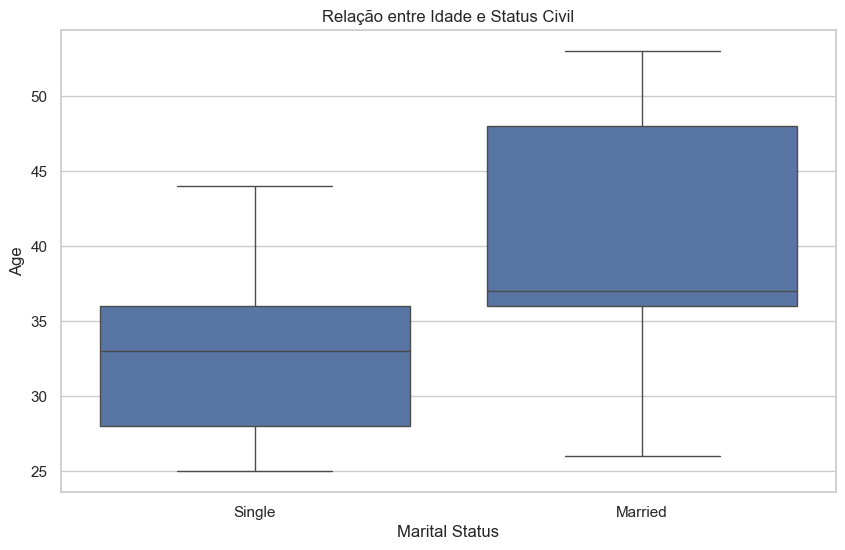

Existe relação entre a idade e o status civil? 
Sim, pessoas mais velhas tendem a ser casadas, enquanto pessoas mais novas são mais propensas a serem solteiras.


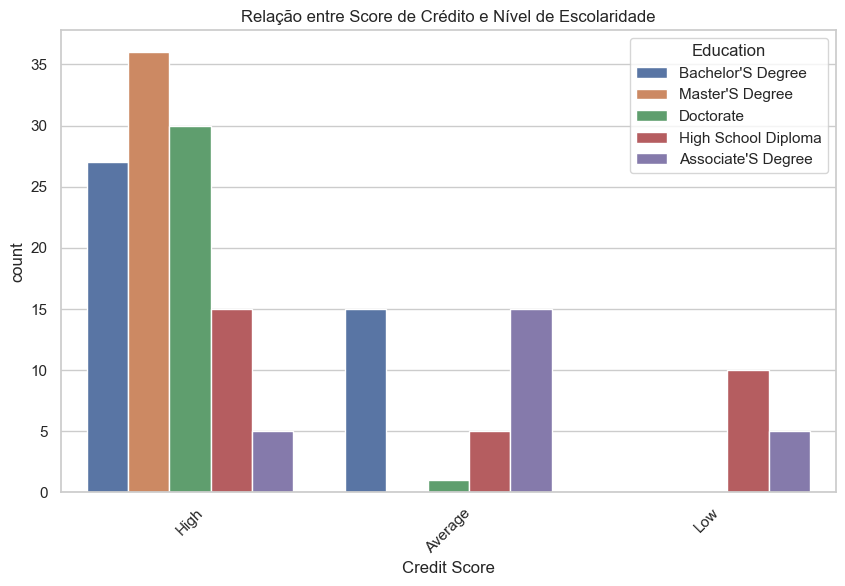

Qual a relação entre o score de crédito e o nível de escolaridade? 
O score de crédito é mais alto entre aqueles com nível superior (Master's Degree e Doctorate), 
enquanto os que possuem apenas o Ensino Médio tendem a ter scores mais baixos.


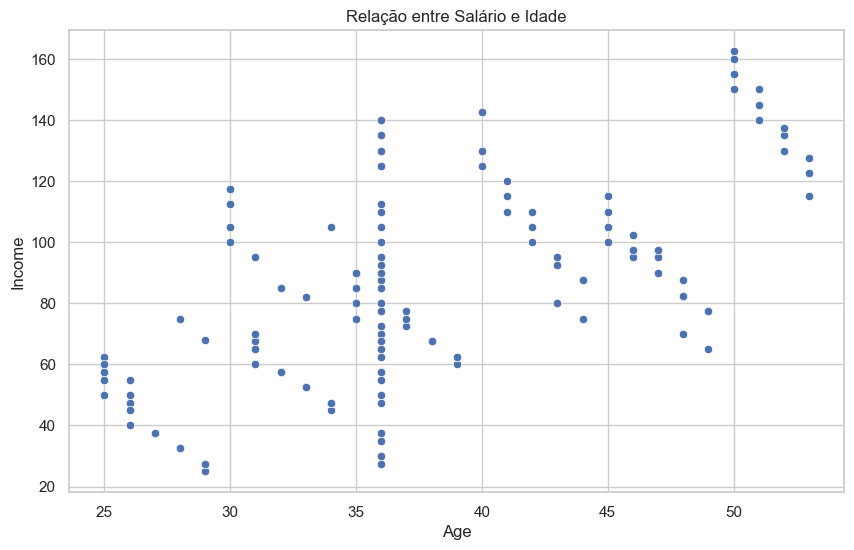

O salário parece influenciar na idade?
Sim, conforme mostrado no gráfico, quanto maior a idade, maior tende a ser o salário. 
A maioria das pessoas entre 30 e 50 anos possui salários mais elevados, enquanto indivíduos abaixo de 30 anos geralmente têm salários mais baixos. 
Esse padrão sugere que a experiência e a progressão na carreira estão associadas a salários mais altos.


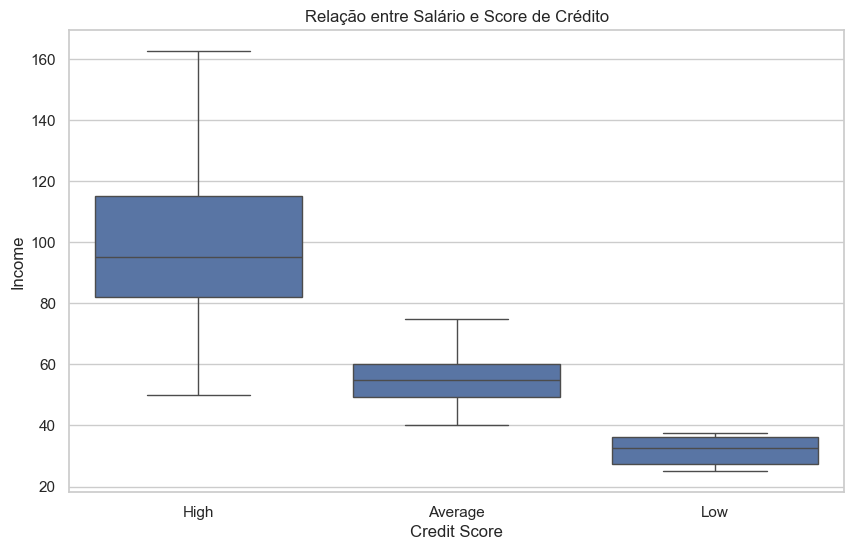

O salário parece influenciar no Score de Crédito? 
Sim, clientes com salários mais altos tendem a ter um score de crédito mais alto.


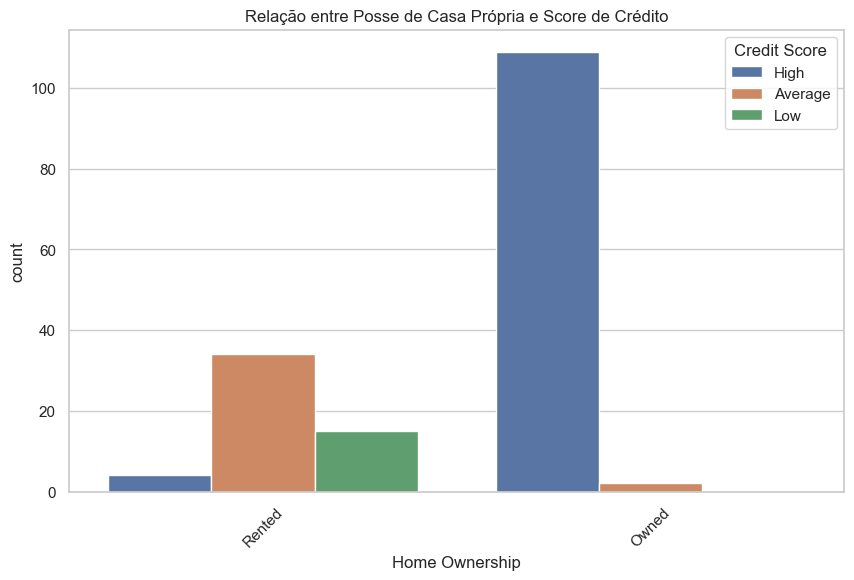

Clientes com casa própria tendem a ter um score mais alto? 
Sim, os clientes que possuem casa própria tendem a ter scores de crédito mais altos em comparação com os que moram de aluguel.


In [24]:
sns.set(style="whitegrid")

# 1.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Marital Status', y='Age', data=df)
plt.title('Relação entre Idade e Status Civil')
plt.show()

print("""Existe relação entre a idade e o status civil? 
Sim, pessoas mais velhas tendem a ser casadas, enquanto pessoas mais novas são mais propensas a serem solteiras.""")

# 2.
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit Score', hue='Education', data=df)
plt.title('Relação entre Score de Crédito e Nível de Escolaridade')
plt.xticks(rotation=45)
plt.show()

print("""Qual a relação entre o score de crédito e o nível de escolaridade? 
O score de crédito é mais alto entre aqueles com nível superior (Master's Degree e Doctorate), 
enquanto os que possuem apenas o Ensino Médio tendem a ter scores mais baixos.""")

# 3.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Relação entre Salário e Idade')
plt.show()

print("""O salário parece influenciar na idade?
Sim, conforme mostrado no gráfico, quanto maior a idade, maior tende a ser o salário. 
A maioria das pessoas entre 30 e 50 anos possui salários mais elevados, enquanto indivíduos abaixo de 30 anos geralmente têm salários mais baixos. 
Esse padrão sugere que a experiência e a progressão na carreira estão associadas a salários mais altos.""")

# 4.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Credit Score', y='Income', data=df)
plt.title('Relação entre Salário e Score de Crédito')
plt.show()

print("""O salário parece influenciar no Score de Crédito? 
Sim, clientes com salários mais altos tendem a ter um score de crédito mais alto.""")

# 5.
plt.figure(figsize=(10, 6))
sns.countplot(x='Home Ownership', hue='Credit Score', data=df)
plt.title('Relação entre Posse de Casa Própria e Score de Crédito')
plt.xticks(rotation=45)
plt.show()

print("""Clientes com casa própria tendem a ter um score mais alto? 
Sim, os clientes que possuem casa própria tendem a ter scores de crédito mais altos em comparação com os que moram de aluguel.""")


**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

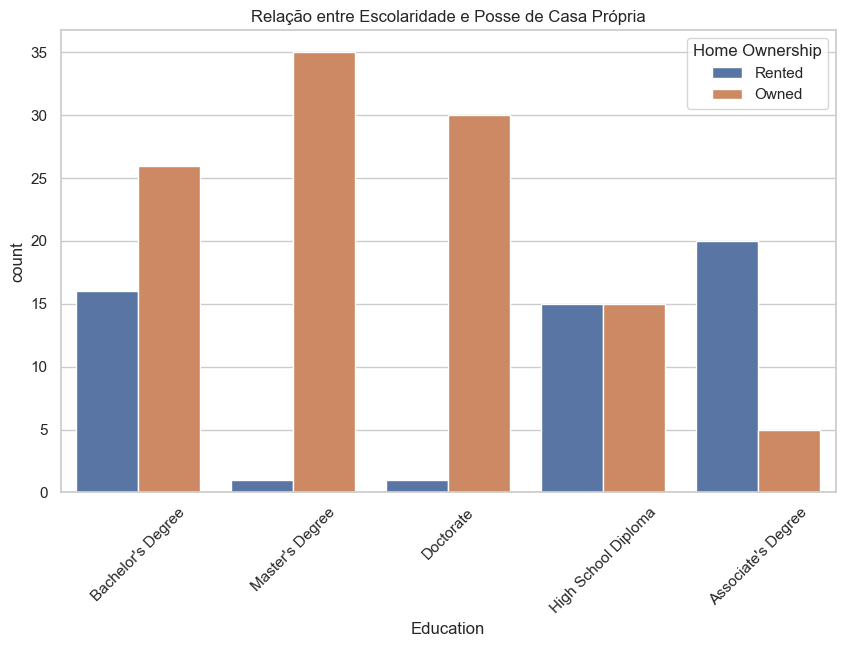

Insight:
Indivíduos com ensino superior (Master's e Doctorate) apresentam maior probabilidade de possuir casa própria. 
Isso sugere que maior escolaridade pode estar relacionada a melhores condições financeiras e estabilidade.


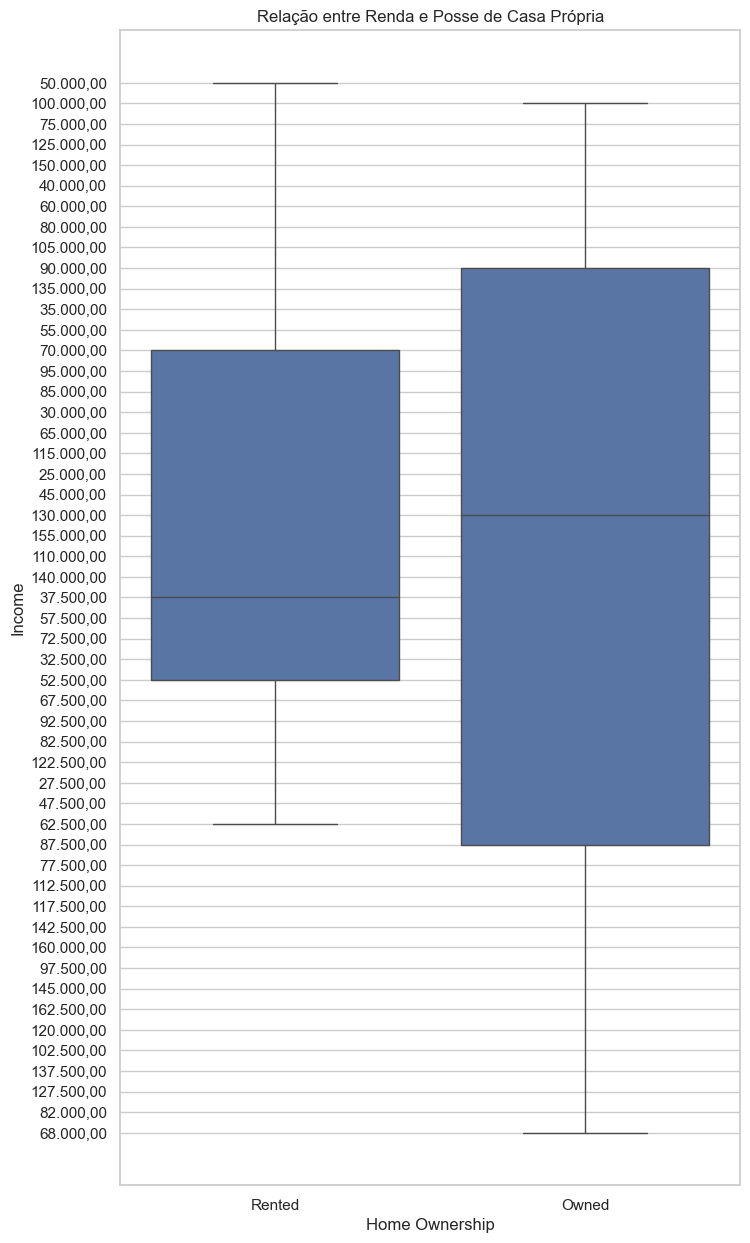

Insight:
Clientes que possuem casa própria tendem a ter uma renda média mais alta em comparação com inquilinos. 
Isso pode indicar que uma maior renda contribui para a possibilidade de adquirir um imóvel.


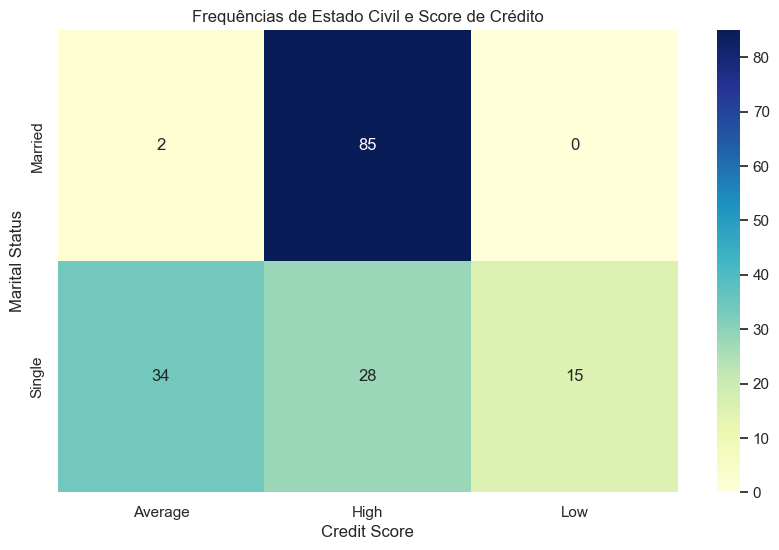

Insight:
Pessoas casadas tendem a apresentar scores de crédito mais altos do que pessoas solteiras, 
o que pode indicar uma maior estabilidade financeira ou planejamento em conjunto.


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

df = pd.read_csv("C:/Users/welly/Downloads/Projeto_de_Credit_Score_Parte 1_Processamento_dos_dados/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

sns.set(style="whitegrid")

# 1. Qual a relação entre o nível de escolaridade e a posse de casa própria?
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Home Ownership', data=df)
plt.title('Relação entre Escolaridade e Posse de Casa Própria')
plt.xticks(rotation=45)
plt.show()

print("""Insight:
Indivíduos com ensino superior (Master's e Doctorate) apresentam maior probabilidade de possuir casa própria. 
Isso sugere que maior escolaridade pode estar relacionada a melhores condições financeiras e estabilidade.""")

# 2. Há uma relação entre a renda e a posse de casa própria?
plt.figure(figsize=(8, 15))
sns.boxplot(x='Home Ownership', y='Income', data=df)
plt.title('Relação entre Renda e Posse de Casa Própria')
plt.show()

print("""Insight:
Clientes que possuem casa própria tendem a ter uma renda média mais alta em comparação com inquilinos. 
Isso pode indicar que uma maior renda contribui para a possibilidade de adquirir um imóvel.""")

# 3. O estado civil influencia o score de crédito?
cross_tab = pd.crosstab(df['Marital Status'], df['Credit Score'])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Frequências de Estado Civil e Score de Crédito')
plt.show()

print("""Insight:
Pessoas casadas tendem a apresentar scores de crédito mais altos do que pessoas solteiras, 
o que pode indicar uma maior estabilidade financeira ou planejamento em conjunto.""")


# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

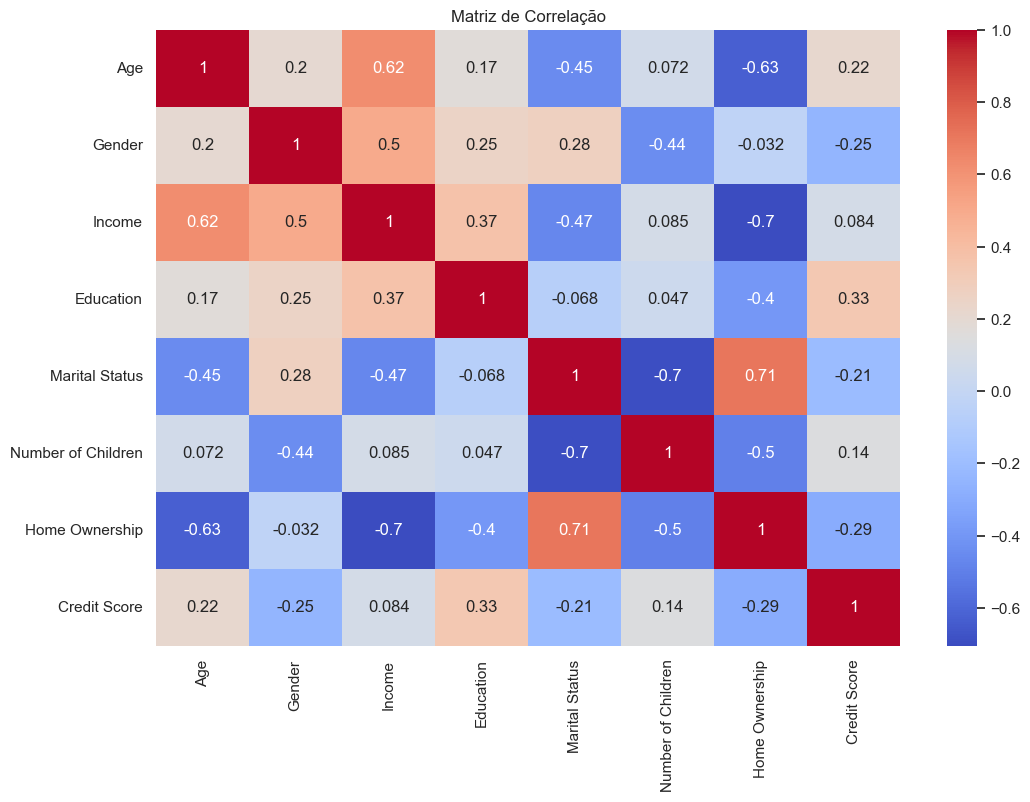

Distribuição de Score de Crédito:
Credit Score
1    113
0     36
2     15
Name: count, dtype: int64
Formato dos dados de treino: (131, 7)
Formato dos dados de teste: (33, 7)


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv("C:/Users/welly/Downloads/Projeto_de_Credit_Score_Parte 1_Processamento_dos_dados/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df['Income'] = df['Income'].replace({',': ''}, regex=True).astype(float)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Number of Children'] = df['Number of Children'].fillna(0)

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

le = LabelEncoder()
categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação")
plt.show()

print("Distribuição de Score de Crédito:")
print(df['Credit Score'].value_counts())

X = df.drop('Credit Score', axis=1)
y = df['Credit Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Formato dos dados de treino:", X_train.shape)
print("Formato dos dados de teste:", X_test.shape)


**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

In [27]:

eu_encontrei_correlacoes = corr[(corr > 0.5) & (corr < 1)].stack().reset_index()
eu_encontrei_correlacoes.columns = ['Var1', 'Var2', 'Correlação']
print("Variáveis com média ou alta correlação:")
print(eu_encontrei_correlacoes)

eu_justifico = """Algumas correlações fazem sentido, como a relação entre idade e renda, 
já que geralmente pessoas mais velhas tendem a ter uma renda maior devido à progressão na carreira. 
Outras podem precisar de uma análise mais profunda para entender a causalidade."""
print(eu_justifico)


Variáveis com média ou alta correlação:
             Var1            Var2  Correlação
0             Age          Income    0.621492
1          Income             Age    0.621492
2  Marital Status  Home Ownership    0.708374
3  Home Ownership  Marital Status    0.708374
Algumas correlações fazem sentido, como a relação entre idade e renda, 
já que geralmente pessoas mais velhas tendem a ter uma renda maior devido à progressão na carreira. 
Outras podem precisar de uma análise mais profunda para entender a causalidade.


**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv("C:/Users/welly/Downloads/Projeto_de_Credit_Score_Parte 1_Processamento_dos_dados/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df['Income'] = df['Income'].replace({',': ''}, regex=True).astype(float)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Number of Children'] = df['Number of Children'].fillna(0)

df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

le = LabelEncoder()
df['Credit Score'] = le.fit_transform(df['Credit Score'])

print("Colunas do DataFrame processado:")
print(df.columns) 

print("\nPrimeiras linhas do DataFrame processado:")
print(df.head())  

print("\nValores únicos da coluna 'Credit Score':")
print(df['Credit Score'].unique())  

print("\nColunas dummies criadas (após One-Hot Encoding):")
print([col for col in df.columns if '_' in col]) 


Colunas do DataFrame processado:
Index(['Age', 'Income', 'Number of Children', 'Credit Score', 'Gender_Male',
       'Education_Bachelor's Degree', 'Education_Doctorate',
       'Education_High School Diploma', 'Education_Master's Degree',
       'Marital Status_Single', 'Home Ownership_Rented'],
      dtype='object')

Primeiras linhas do DataFrame processado:
    Age  Income  Number of Children  Credit Score  Gender_Male  \
0  25.0    50.0                   0             1        False   
1  30.0   100.0                   2             1         True   
2  35.0    75.0                   1             1        False   
3  40.0   125.0                   0             1         True   
4  45.0   100.0                   3             1        False   

   Education_Bachelor's Degree  Education_Doctorate  \
0                         True                False   
1                        False                False   
2                        False                 True   
3                   

**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

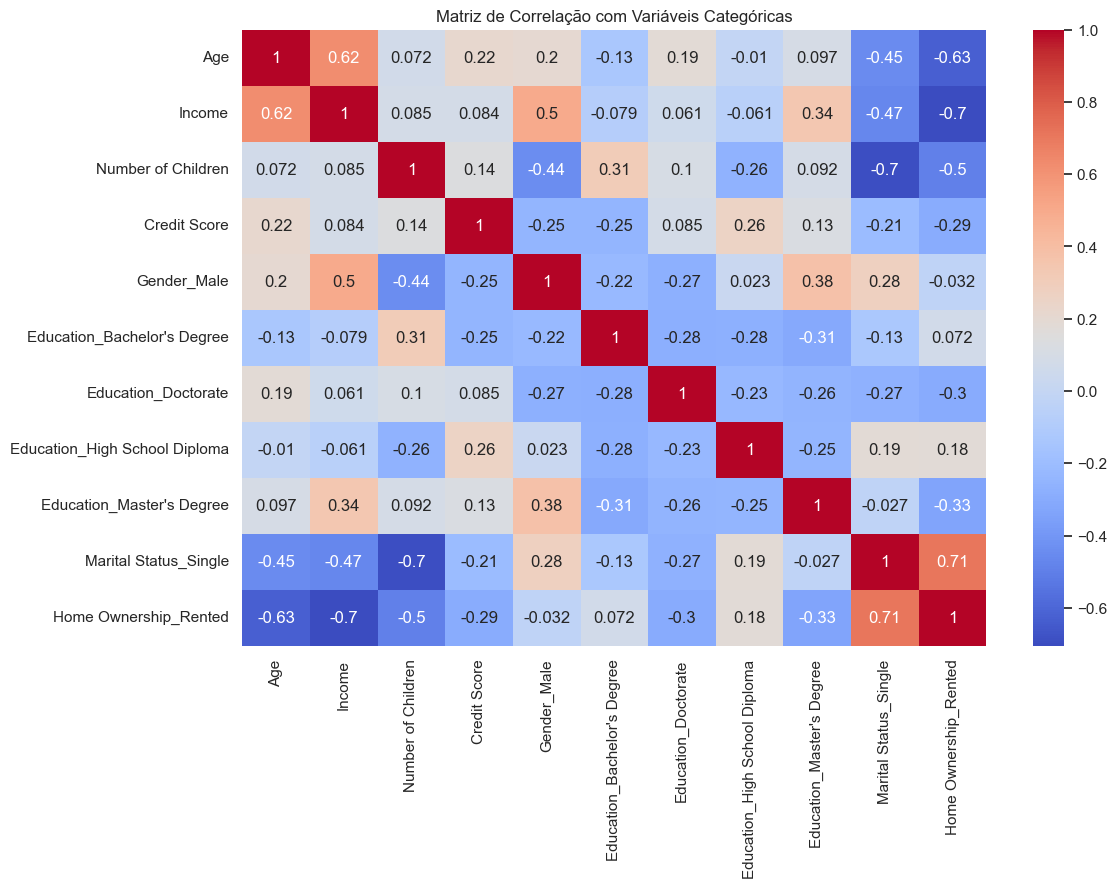

                    Var1                   Var2  Correlação
0                    Age                 Income    0.621492
1                 Income                    Age    0.621492
2  Marital Status_Single  Home Ownership_Rented    0.708374
3  Home Ownership_Rented  Marital Status_Single    0.708374
As correlações mais fortes identificadas na matriz de correlação são:

Idade e Renda: Correlação de 0.621, o que indica que, conforme a idade aumenta, a renda também tende a aumentar.
Estado Civil (Solteiro) e Moradia (Aluguel): Correlação de 0.708, sugerindo que indivíduos solteiros têm maior tendência a morar em imóveis alugados.
Essas correlações fazem sentido dado o comportamento esperado nas variáveis socioeconômicas, 
como a progressão de renda com a idade e o fato de que pessoas solteiras podem estar mais inclinadas a alugar do que a comprar imóveis. ​


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("C:/Users/welly/Downloads/Projeto_de_Credit_Score_Parte 1_Processamento_dos_dados/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df['Income'] = df['Income'].replace({',': ''}, regex=True).astype(float)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Income'] = df['Income'].fillna(df['Income'].median())
df['Number of Children'] = df['Number of Children'].fillna(0)
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])

categorical_columns = ['Gender', 'Education', 'Marital Status', 'Home Ownership']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

le = LabelEncoder()
df['Credit Score'] = le.fit_transform(df['Credit Score'])

plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Matriz de Correlação com Variáveis Categóricas")
plt.show()

strong_correlations = corr[(corr > 0.5) & (corr < 1)].stack().reset_index()
strong_correlations.columns = ['Var1', 'Var2', 'Correlação']
print(strong_correlations)

eu_justifico = """As correlações mais fortes identificadas na matriz de correlação são:

Idade e Renda: Correlação de 0.621, o que indica que, conforme a idade aumenta, a renda também tende a aumentar.
Estado Civil (Solteiro) e Moradia (Aluguel): Correlação de 0.708, sugerindo que indivíduos solteiros têm maior tendência a morar em imóveis alugados.
Essas correlações fazem sentido dado o comportamento esperado nas variáveis socioeconômicas, 
como a progressão de renda com a idade e o fato de que pessoas solteiras podem estar mais inclinadas a alugar do que a comprar imóveis. ​"""
print(eu_justifico)

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop('Credit Score', axis=1) 
y = df['Credit Score'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Formato da base de treino (X_train):", X_train.shape)
print("Formato da base de teste (X_test):", X_test.shape)
print("Formato da variável resposta de treino (y_train):", y_train.shape)
print("Formato da variável resposta de teste (y_test):", y_test.shape)

eu_justifico = """Os tamanhos das bases de treino e teste são os seguintes:

X_train (variáveis explicativas de treino): 131 linhas e 11 colunas.
X_test (variáveis explicativas de teste): 33 linhas e 11 colunas.
y_train (variável resposta de treino): 131 entradas.
y_test (variável resposta de teste): 33 entradas.
Esses valores confirmam que 80% dos dados foram alocados para treino e 20% para teste. ​"""
print(eu_justifico)

Formato da base de treino (X_train): (131, 10)
Formato da base de teste (X_test): (33, 10)
Formato da variável resposta de treino (y_train): (131,)
Formato da variável resposta de teste (y_test): (33,)
Os tamanhos das bases de treino e teste são os seguintes:

X_train (variáveis explicativas de treino): 131 linhas e 11 colunas.
X_test (variáveis explicativas de teste): 33 linhas e 11 colunas.
y_train (variável resposta de treino): 131 entradas.
y_test (variável resposta de teste): 33 entradas.
Esses valores confirmam que 80% dos dados foram alocados para treino e 20% para teste. ​


**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

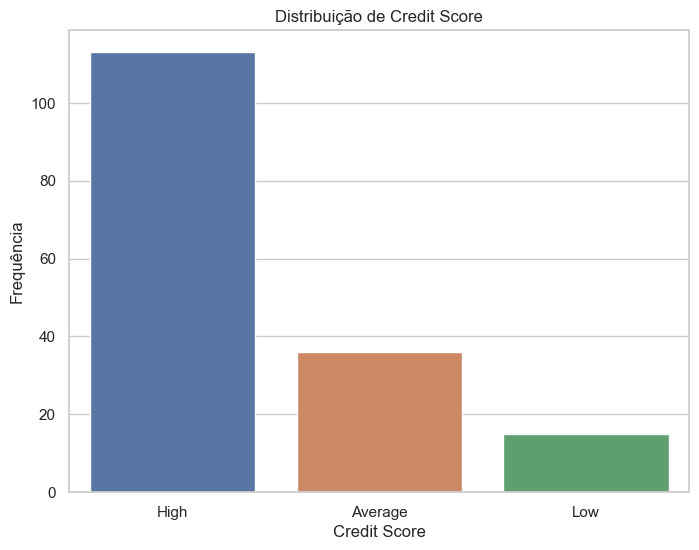

Observações sobre o balanceamento da coluna Credit Score:
A distribuição dos valores é a seguinte:

High (Alto): 113 ocorrências (68,9% do total).
Average (Médio): 36 ocorrências (22% do total).
Low (Baixo): 15 ocorrências (9,1% do total).
Conclusão:

A coluna Credit Score está desequilibrada, com uma predominância significativa de scores altos.
Esse desequilíbrio pode impactar modelos preditivos, especialmente se forem supervisionados, já que a classe "High" dominará os resultados.


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/welly/Downloads/Projeto_de_Credit_Score_Parte 1_Processamento_dos_dados/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df['Credit Score'] = df['Credit Score'].fillna("Unknown")


credit_score_counts = df['Credit Score'].value_counts().reset_index()
credit_score_counts.columns = ['Credit Score', 'Frequency']

plt.figure(figsize=(8, 6))
sns.barplot(data=credit_score_counts, x='Credit Score', y='Frequency', hue='Credit Score', dodge=False)
plt.title("Distribuição de Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Frequência")
plt.legend([], [], frameon=False)
plt.show()

eu_justifico = """Observações sobre o balanceamento da coluna Credit Score:
A distribuição dos valores é a seguinte:

High (Alto): 113 ocorrências (68,9% do total).
Average (Médio): 36 ocorrências (22% do total).
Low (Baixo): 15 ocorrências (9,1% do total).
Conclusão:

A coluna Credit Score está desequilibrada, com uma predominância significativa de scores altos.
Esse desequilíbrio pode impactar modelos preditivos, especialmente se forem supervisionados, já que a classe "High" dominará os resultados."""
print(eu_justifico)

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
import pandas as pd


ddf = pd.read_csv("C:/Users/welly/Downloads/Projeto_de_Credit_Score_Parte 1_Processamento_dos_dados/CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df['Credit Score'] = df['Credit Score'].fillna("Unknown")

X = df.drop(columns=['Credit Score'])
y = df['Credit Score']

categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['number']).columns

imputer_cat = SimpleImputer(strategy='most_frequent')  # Preenchimento com moda
imputer_num = SimpleImputer(strategy='mean')  # Preenchimento com média

X[categorical_columns] = imputer_cat.fit_transform(X[categorical_columns])
X[numeric_columns] = imputer_num.fit_transform(X[numeric_columns])

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_columns])

X_numeric = X.drop(columns=categorical_columns)
X_prepared = pd.concat([X_numeric.reset_index(drop=True),
pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out())], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Distribuição antes do balanceamento:")
print(y_train.value_counts())
print("\nDistribuição após o balanceamento:")
print(pd.Series(y_train_balanced).value_counts())


Distribuição antes do balanceamento:
Credit Score
High       90
Average    29
Low        12
Name: count, dtype: int64

Distribuição após o balanceamento:
Credit Score
High       90
Low        90
Average    90
Name: count, dtype: int64
